In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# creating empty reviews list
iphone_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  

url = 'https://www.amazon.in/Apple-iPhone-XR-128GB-Blue/product-reviews/B07JH6RFF4'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    iphone_reviews=iphone_reviews+ip

# writng reviews in a text file 
with open("iphone.txt","w",encoding='utf8') as output:
    output.write(str(iphone_reviews))

In [3]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)

In [4]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


In [5]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'after', 'transition', 'from', 'android', 'to', 'ios', 'i', 'felt', 'android', 'is', 'more', 'user', 'friendly', 'compared', 'to', 'ios', 'bought', 'iphone', 'only', 'to', 'try', 'it', 's', 'charisma', 'nothing', 'more', 'than', 'that', 'pros', 'only', 'apple', 'brandcons', 'portrait', 'is', 'not', 'that', 'great', 'to', 'say', 'franklytime', 'consuming', 'task', 'using', 'itunesno', 'finger', 'printnot', 'handy', 'to', 'move', 'back', 'from', 'appsnot', 'that', 'slim', 'mobilecharging', 'taking', 'atleast', 'hrs', 'for', 'switch', 'off', 'is', 'not', 'easierevery', 'time', 'have', 'to', 'go', 'settings', 'screen', 'to', 'use', 'more', 'wifi', 'location', 'services', 'literally', 'no', 'future', 'for', 'apple', 'until', 'they', 'make', 'user', 'friendly', 'feeling', 'very', 'bad', 'after', 'purchasing', 'after', 'transition', 'from', 'android', 'to', 'ios', 'i', 'felt', 'android', 'is', 'more', 'user', 'friendly', 'compared', 'to', 'ios', 'bought', 'iphone', 'only', 'to', 'try', '

In [6]:
with open("C:/Users/manth/Assignment/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [7]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)


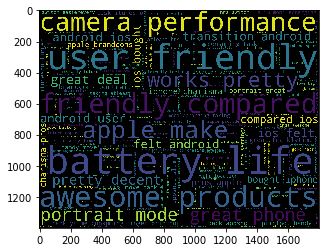

In [8]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

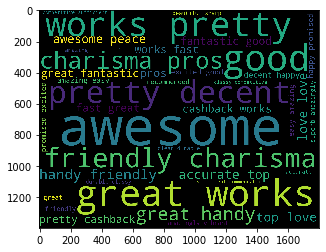

In [9]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

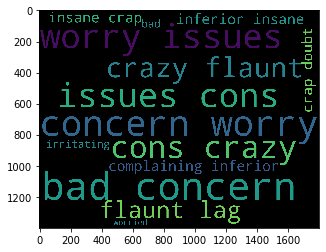

In [10]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)